In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
df=pd.read_csv("netflix_titles.csv")
df=df[['type', 'description']].dropna()

In [14]:
df

,type,description
0,Movie,"As her father nears the end of his life, filmm..."
1,TV Show,"After crossing paths at a party, a Cape Town t..."
2,TV Show,To protect his family from a powerful drug lor...
3,TV Show,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,In a city of coaching centers known to train I...
...,...,...
8802,Movie,"A political cartoonist, a crime reporter and a..."
8803,TV Show,"While living alone in a spooky town, a young g..."
8804,Movie,Looking to survive in a world taken over by zo...
8805,Movie,"Dragged from civilian life, a former superhero..."


In [16]:
le=LabelEncoder()
df['label']=le.fit_transform(df['type'])

In [18]:
texts=df['description'].values
labels=df['label'].values

In [20]:
max_words=5000
max_len=150

In [26]:
tokenizer=Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

In [28]:
tokenizer

In [30]:
sequences=tokenizer.texts_to_sequences(texts)
padded_sequences=pad_sequences(sequences,maxlen=max_len, padding='post')

In [70]:
sequences

[[18,
  10,
  72,
  3704,
  3,
  394,
  6,
  8,
  23,
  504,
  1,
  4969,
  1992,
  8,
  99,
  7,
  4231,
  5,
  4232,
  448,
  4,
  61,
  53,
  247,
  179,
  3,
  1],
 [21,
  3324,
  462,
  28,
  2,
  351,
  2,
  4970,
  80,
  83,
  164,
  40,
  4,
  432,
  1145,
  2,
  804,
  52,
  4233,
  135,
  19,
  10,
  259,
  25,
  255,
  1637,
  28,
  880],
 [4,
  333,
  8,
  33,
  17,
  2,
  242,
  155,
  607,
  1452,
  805,
  1,
  5,
  8,
  668,
  92,
  6,
  2709,
  46,
  2973,
  30,
  2,
  363,
  5,
  334,
  4234,
  87],
 [1,
  1,
  5,
  4971,
  1010,
  172,
  84,
  688,
  3,
  2974,
  118,
  28,
  3,
  2143,
  364,
  761,
  7,
  31,
  2143,
  13,
  16,
  1732,
  208,
  45],
 [7,
  2,
  79,
  6,
  4235,
  2326,
  365,
  4,
  669,
  1863,
  1,
  1,
  2144,
  11,
  4972,
  26,
  1,
  133,
  5,
  8,
  43,
  352,
  2327,
  23],
 [3,
  1733,
  6,
  2,
  1146,
  29,
  1545,
  340,
  1,
  1,
  3325,
  1092,
  5,
  1,
  1195,
  1,
  4,
  2,
  1196,
  80,
  463,
  4,
  1453],
 [1,
  2710,
  26,
  2,

In [38]:
x_train,x_test, y_train, y_test=train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [50]:
model=models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim= 64, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\vaishnavi\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)       │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm (LSTM)                   │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ ?                     │  0 (unbuilt) │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6987 - loss: 0.6149 - val_accuracy: 0.6948 - val_loss: 0.6156
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.6987 - loss: 0.6131 - val_accuracy: 0.6948 - val_loss: 0.6159
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.6987 - loss: 0.6135 - val_accuracy: 0.6948 - val_loss: 0.6152
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.6987 - loss: 0.6131 - val_accuracy: 0.6948 - val_loss: 0.6152
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6987 - loss: 0.6125 - val_accuracy: 0.6948 - val_loss: 0.6181


In [66]:
loss, acc=model.evaluate(x_test, y_test)
print(f"\n Test Accuracy:{acc:.4f}")
print(f"\n loss:{loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6890 - loss: 0.6239

 Test Accuracy:0.6890

 loss:0.6239


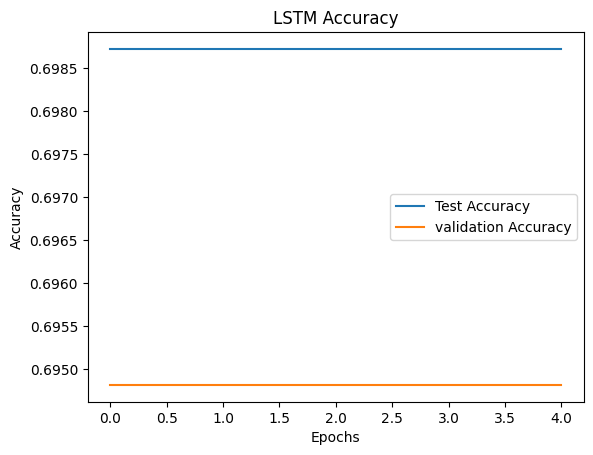

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Accuracy")
plt.legend()
plt.show()

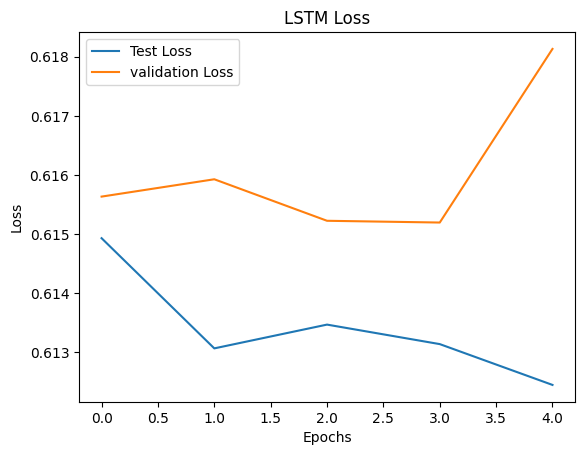

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label= 'validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Loss")
plt.legend()
plt.show()